## 进入 MMEditing 主目录

In [1]:
import os
os.chdir('mmediting')
os.listdir()

['.git',
 '.circleci',
 '.dele.yml',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmedit',
 'model-index.yml',
 'projects',
 'requirements.txt',
 'requirements',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmedit.egg-info',
 'outputs',
 'data',
 'checkpoints',
 'work_dirs',
 'resources']

无条件GAN模型不需要输入，输出一个图像。
我们以‘styleganv1’为例。

02/21 11:49:26 - mmengine - WARNING - The "model" registry in mmedit did not set import location. Fallback to call `mmedit.utils.register_all_modules` instead.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/styleganv1/styleganv1_ffhq_256_g8_25Mimg_20210407_161748-0094da86.pth


Downloading: "https://download.openmmlab.com/mmediting/styleganv1/styleganv1_ffhq_256_g8_25Mimg_20210407_161748-0094da86.pth" to /home/featurize/.cache/torch/hub/checkpoints/styleganv1_ffhq_256_g8_25Mimg_20210407_161748-0094da86.pth


Switch to evaluation style mode: single
Switch to evaluation style mode: single


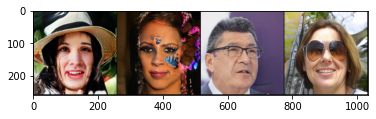

In [2]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
result_out_dir = 'resources/output/unconditional/tutorial_unconditional_styleganv1_res.png'
editor = MMEdit('styleganv1')
results = editor.infer(result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

## 视频插值模型的推断

视频插值模型将视频作为输入，并输出插值后的视频。
我们以‘flavr’为例。

In [5]:
import os
from mmedit.edit import MMEdit
from mmengine import mkdir_or_exist

# Create a MMEdit instance and infer
video = 'resources/input/video_interpolation/b-3LLDhc4EU_000000_000010.mp4'
result_out_dir = 'resources/output/video_interpolation/tutorial_video_interpolation_flavr_res.mp4'
mkdir_or_exist(os.path.dirname(result_out_dir))
editor = MMEdit('flavr')
results = editor.infer(video=video, result_out_dir=result_out_dir)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/video_interpolators/flavr/flavr_in4out1_g8b4_vimeo90k_septuplet_20220509-c2468995.pth
[                                                  ] 0/22, elapsed: 0s, ETA:

RuntimeError: CUDA out of memory. Tried to allocate 178.00 MiB (GPU 0; 11.77 GiB total capacity; 923.66 MiB already allocated; 64.25 MiB free; 1010.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## 视频恢复模型的推理

视频恢复模型将视频作为输入，并输出恢复的视频。我们以“basicvsr”为例.

In [8]:
import os
from mmedit.edit import MMEdit
from mmengine import mkdir_or_exist

# Create a MMEdit instance and infer
video = 'resources/input/video_restoration/QUuC4vJs_000084_000094_400x320.mp4'
result_out_dir = 'resources/output/video_restoration/tutorial_video_restoration_edvr_res.mp4'
mkdir_or_exist(os.path.dirname(result_out_dir))
editor = MMEdit('edvr', extra_parameters={'window_size':5})
results = editor.infer(video=video, result_out_dir=result_out_dir)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/restorers/edvr/edvrm_wotsa_x4_8x4_600k_reds_20200522-0570e567.pth


RuntimeError: CUDA out of memory. Tried to allocate 158.00 MiB (GPU 0; 11.77 GiB total capacity; 953.88 MiB already allocated; 42.25 MiB free; 1.01 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## 文本到图像模型的推理

文本到图像模型将文本作为输入，并输出图像。
我们以“disco”为例。

In [10]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit
from mmengine import mkdir_or_exist

# Create a MMEdit instance and infer
editor = MMEdit(model_name='disco')
text_prompts = {
    0: [
        'clouds surround the mountains and Chinese palaces,sunshine,lake,overlook,overlook,unreal engine,light effect,Dream，Greg Rutkowski,James Gurney,artstation'
    ]
}
result_out_dir = 'resources/output/text2image/tutorial_text2image_disco_res.png'
editor.infer(text=text_prompts, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

ValueError: Model disco is not supported.